In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
os.getcwd()

'/Users/cyang/coding/projects/dnpsoup0/py_scripts/case_studies/examples/TOTAPOL'

In [4]:
result_folder = '../../../../results/'

## Eigen Values

In [5]:
result_filename = 'TOTAPOL_eeH_cw_400MHz_eigenvals_output_res100ns.log'
result_path = os.path.join(result_folder, result_filename)
os.path.exists(result_path)

True

In [6]:
df_eigenvals = pd.read_csv(result_path, delimiter=',', skiprows=1, header=None)
df_eigenvals.head()

,0,1,2,3,4,5,6,7,8
0,0.000000e+00,-2.636312e+11,-2.632325e+11,-3.130539e+08,-8.781587e+07,8.567447e+07,3.117846e+08,2.632337e+11,2.636333e+11
1,9.989213e-08,-2.636312e+11,-2.632325e+11,-3.116226e+08,-8.924722e+07,8.710583e+07,3.103532e+08,2.632337e+11,2.636334e+11
2,1.997843e-07,-2.636312e+11,-2.632325e+11,-3.101865e+08,-9.068329e+07,8.854189e+07,3.089172e+08,2.632338e+11,2.636334e+11
3,2.996764e-07,-2.636312e+11,-2.632325e+11,-3.087459e+08,-9.212392e+07,8.998252e+07,3.074765e+08,2.632337e+11,2.636334e+11
4,3.995685e-07,-2.636312e+11,-2.632325e+11,-3.073008e+08,-9.356897e+07,9.142757e+07,3.060315e+08,2.632337e+11,2.636333e+11


<IPython.core.display.Javascript object>


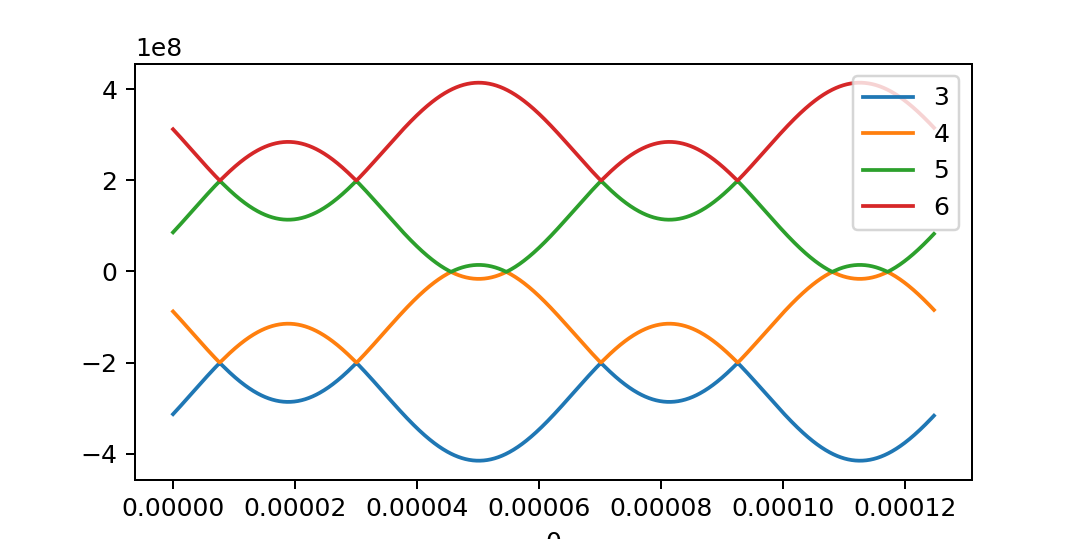

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(6,3))
df_eigenvals.plot(x=0, y=[3, 4, 5, 6], ax=axes)
plt.show()

## Build Ups

+ Evaluate rotor increment step size

In [17]:
result_name_template = 'TOTAPOL_eeH_cw_400MHz_buildup_res{}.log'
increments = ['10ns', '100ns', '1us']
result_filenames = [result_name_template.format(elem) for elem in increments]
result_paths = [os.path.join(result_folder, result_filename) for result_filename in result_filenames]
for name in result_paths:
    if not os.path.exists(name):
        print('{} does not exists.'.format(name))

In [18]:
df_buildups = []
for pathname in result_paths:
    df_buildup = pd.read_csv(pathname, delimiter=',', skiprows=2, header=None)
    df_buildups.append(df_buildup)
len(df_buildups)

3

<IPython.core.display.Javascript object>


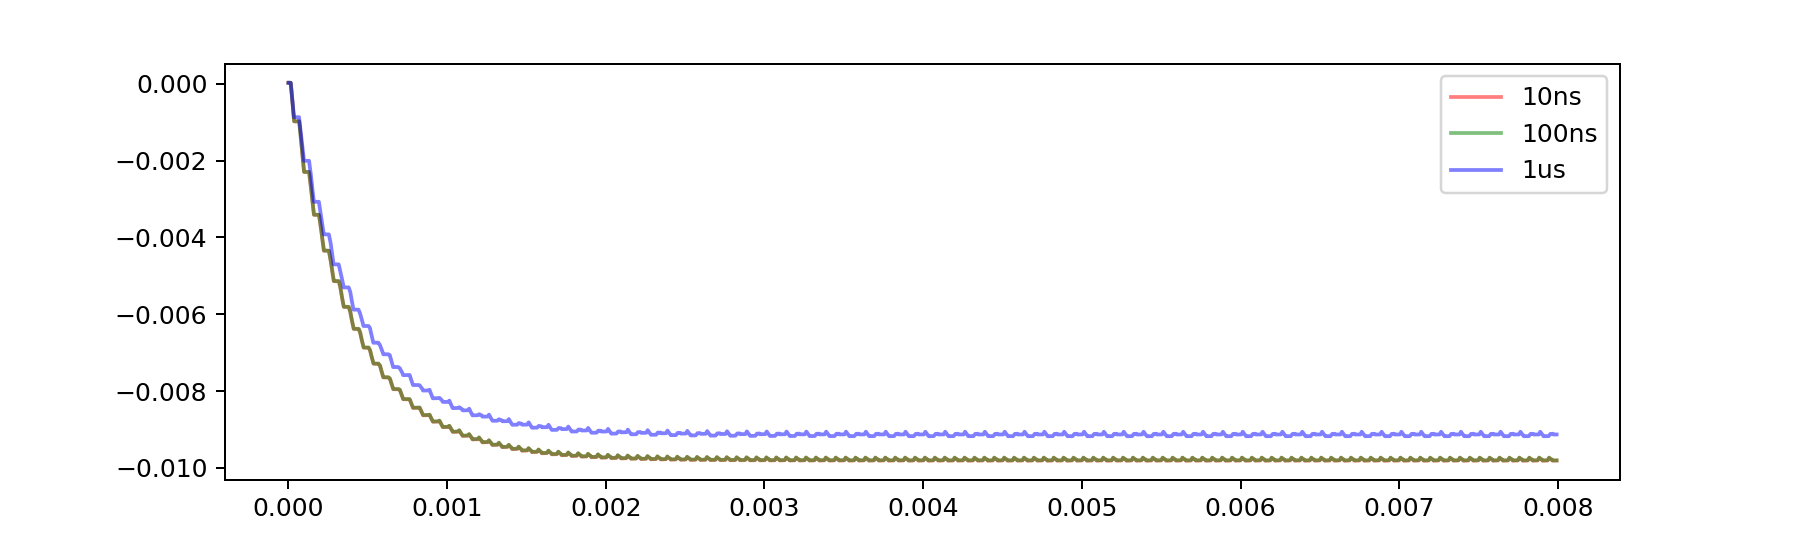

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']
for i, buildup in enumerate(df_buildups):
    x = buildup.iloc[:, 0]
    y = buildup.iloc[:, 1]
    style_str = '{}-'.format(colors[i], markers[i])
    ax.plot(x, y, style_str, label=increments[i], alpha=0.5, markerfacecolor='none')
plt.legend(loc='best')
plt.show()